In [2]:
import pandas as pd

nov_merged = pd.read_csv('../DATASET/obs_est_merged/nov_merged.csv')

In [3]:
nov_merged

,lat,lon,year,month,precip_est,precip_obs,bias_nov
0,45.0,-20.0,1981,12,107.417970,131.149290,-23.731320
1,45.0,-19.0,1981,12,98.339840,126.678470,-28.338630
2,45.0,-18.0,1981,12,92.800780,122.924805,-30.124025
3,45.0,-17.0,1981,12,88.367190,139.038090,-50.670900
4,45.0,-16.0,1981,12,85.582030,123.603820,-38.021790
...,...,...,...,...,...,...,...
230251,20.0,16.0,2017,5,1.878309,0.118256,1.760054
230252,20.0,17.0,2017,5,1.065809,0.591278,0.474531
230253,20.0,18.0,2017,5,1.386122,0.591278,0.794844
230254,20.0,19.0,2017,5,1.241591,1.182556,0.059034


In [4]:
nov_average= nov_merged
nov_average = nov_average.drop(columns=['precip_obs'])
nov_average = nov_average[(nov_average['lon'] >= -18) & (nov_average['lon'] <= 0)]
nov_average = nov_average[(nov_average['lat'] >= 20) & (nov_average['lat'] <= 38)]

In [5]:
nov_average[nov_average['lon'] == -18]

,lat,lon,year,month,precip_est,bias_nov
289,38.0,-18.0,1981,12,96.156250,37.829530
330,37.0,-18.0,1981,12,89.542970,43.125734
371,36.0,-18.0,1981,12,86.285160,45.544193
412,35.0,-18.0,1981,12,90.125000,55.502808
453,34.0,-18.0,1981,12,90.265625,59.252136
...,...,...,...,...,...,...
230053,24.0,-18.0,2017,5,1.643934,1.052656
230094,23.0,-18.0,2017,5,0.960341,0.605574
230135,22.0,-18.0,2017,5,0.386122,0.267866
230176,21.0,-18.0,2017,5,0.218153,0.218153


In [6]:
nov_average

,lat,lon,year,month,precip_est,bias_nov
289,38.0,-18.0,1981,12,96.156250,37.829530
290,38.0,-17.0,1981,12,91.640625,23.319395
291,38.0,-16.0,1981,12,86.648440,18.357730
292,38.0,-15.0,1981,12,85.902340,12.583860
293,38.0,-14.0,1981,12,85.621090,20.313470
...,...,...,...,...,...,...
230231,20.0,-4.0,2017,5,0.104872,-2.615007
230232,20.0,-3.0,2017,5,0.116590,-6.978746
230233,20.0,-2.0,2017,5,0.167372,-6.100176
230234,20.0,-1.0,2017,5,0.198622,-3.822069


In [7]:
nov_average.describe()

,lat,lon,year,month,precip_est,bias_nov
count,77976.000000,77976.000000,77976.000000,77976.000000,7.797600e+04,77976.000000
mean,29.000000,-9.000000,1999.333333,4.500000,2.035252e+01,5.127592
std,5.477261,5.477261,10.395044,3.593999,2.418690e+01,22.290303
min,20.000000,-18.000000,1981.000000,1.000000,-8.263542e-19,-555.458370
25%,24.000000,-14.000000,1990.000000,2.000000,1.309362e+00,0.011712
50%,29.000000,-9.000000,1999.000000,3.500000,7.280016e+00,1.662832
75%,34.000000,-4.000000,2008.000000,5.000000,3.606150e+01,12.154102
max,38.000000,0.000000,2017.000000,12.000000,1.870469e+02,161.665776


In [8]:
nov_ndup = nov_average.drop_duplicates()

In [9]:
len(nov_average.duplicated())

77976

In [10]:
nov_test = nov_average.sort_values(['year', 'month'])
nov_test = nov_average.reset_index(drop=True)

X, y = nov_test[['lat', 'lon', 'month', 'precip_est', 'year']], nov_test['bias_nov'] 
# X = X.sort_values('month')

In [11]:
nov_test

,lat,lon,year,month,precip_est,bias_nov
0,38.0,-18.0,1981,12,96.156250,37.829530
1,38.0,-17.0,1981,12,91.640625,23.319395
2,38.0,-16.0,1981,12,86.648440,18.357730
3,38.0,-15.0,1981,12,85.902340,12.583860
4,38.0,-14.0,1981,12,85.621090,20.313470
...,...,...,...,...,...,...
77971,20.0,-4.0,2017,5,0.104872,-2.615007
77972,20.0,-3.0,2017,5,0.116590,-6.978746
77973,20.0,-2.0,2017,5,0.167372,-6.100176
77974,20.0,-1.0,2017,5,0.198622,-3.822069


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (statsmodels does not add a constant by default)
X_train_sm = sm.add_constant(X_train)

# Fit the Ordinary Least Squares model with statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Get coefficients and p-values
coefficients = results.params
p_values = results.pvalues

# Create a DataFrame for easier visualization
feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
})

# Filtering to remove the constant (intercept) term if present
feature_importance = feature_importance[feature_importance['Feature'] != 'const']

display(feature_importance)

,Feature,Coefficient,P-Value
1,lat,-0.520937,3.034279e-88
2,lon,-0.218835,3.216556e-42
3,month,-0.091676,7.316024e-05
4,precip_est,0.415686,0.000000e+00
5,year,0.011286,1.573564e-01


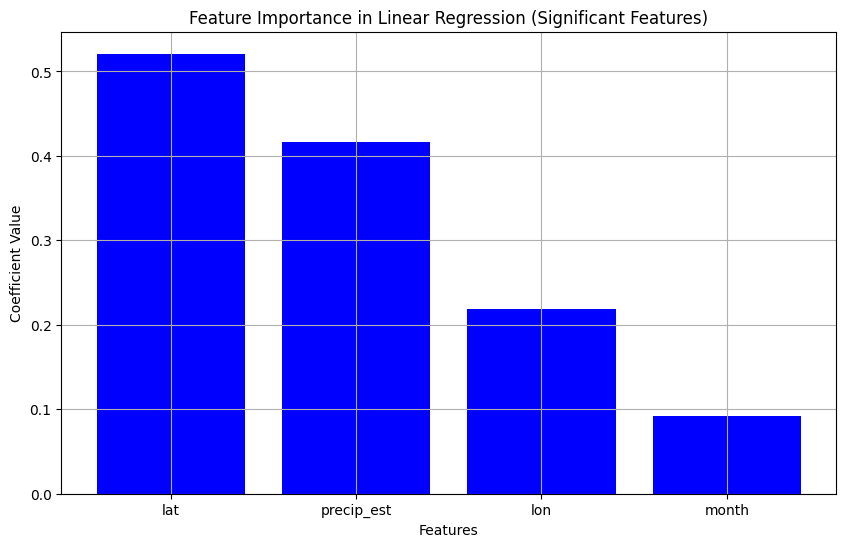

In [13]:
# Sorting the features by the absolute value of their coefficients, considering only significant ones (p < 0.05)
significant_features = feature_importance[feature_importance['P-Value'] < 0.05]
significant_features = significant_features.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting feature importance for significant features
plt.figure(figsize=(10, 6))
plt.bar(significant_features['Feature'],  abs(significant_features['Coefficient']), color='b')
plt.title('Feature Importance in Linear Regression (Significant Features)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

### Model selection

In [61]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

In [62]:
# # Define the models
# models = {
#     "Linear Regression": LinearRegression(),
#     "XGBoost": XGBRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
#     "LGBM Regressor": LGBMRegressor(random_state=42)
# }
# k = 4
# kf = KFold(n_splits=k)
# results = {}

# for model_name, model in models.items():
#     train_rmse_scores = []
#     test_rmse_scores = []
#     train_r2_scores = []
#     test_r2_scores = []

#     # Note that we pass groups to the split method
#     for train_index, test_index in kf.split(X):
#         x_train_fold, x_test_fold = X.iloc[train_index].drop('year'), X.iloc[test_index].drop('year')

#         print(f'''▶️ X_train{x_train_fold['month'].unique()}
# ▶️ X_test{x_test_fold['month'].unique()}''')
#         print("Train indices:", train_index, "Test indices:", test_index)

#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#         # Train and predict
#         model.fit(x_train_fold, y_train_fold)
#         y_pred_train = model.predict(x_train_fold)
#         y_pred_test = model.predict(x_test_fold)

#         # Calculate RMSE
#         rmse_train = mean_squared_error(y_train_fold, y_pred_train, squared=False)
#         rmse_test = mean_squared_error(y_test_fold, y_pred_test, squared=False)
#         r2_train = r2_score(y_train_fold, y_pred_train)
#         r2_test = r2_score(y_test_fold, y_pred_test)

#         train_rmse_scores.append(rmse_train)
#         test_rmse_scores.append(rmse_test)
#         train_r2_scores.append(r2_train)
#         test_r2_scores.append(r2_test)

#     avg_train_rmse = sum(train_rmse_scores) / k
#     avg_test_rmse = sum(test_rmse_scores) / k
#     avg_train_r2 = sum(train_r2_scores) / k
#     avg_test_r2 = sum(test_r2_scores) / k

#     results[model_name] = {
#         "train_rmse": avg_train_rmse,
#         "test_rmse": avg_test_rmse,
#         "train_r2": avg_train_r2,
#         "test_r2": avg_test_r2
#     }

# # for model_name, metrics in results.items():
# #     print(f"{model_name} - Train RMSE: {metrics['train_rmse']}, Test RMSE: {metrics['test_rmse']}")

In [82]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "LGBM Regressor": LGBMRegressor(random_state=42)
}

k = 5 # 80% 20%
tscv = TimeSeriesSplit(n_splits=5)
results = {}

for model_name, model in models.items():
    train_rmse_scores = []
    test_rmse_scores = []
    train_r2_scores = []
    test_r2_scores = []

    # Note that we pass groups to the split method
    for train_index, test_index in tscv.split(X):
        x_train_fold, x_test_fold = X.iloc[train_index].drop(columns=['year', 'month']), X.iloc[test_index].drop(columns=['year', 'month'])
        # x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]


#         print(f'''▶️ X_train{x_train_fold['year'].unique()}
# ▶️ X_test{x_test_fold['year'].unique()}''')
        # print("Train indices:", train_index, "Test indices:", test_index)

        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Train and predict
        model.fit(x_train_fold, y_train_fold)
        y_pred_train = model.predict(x_train_fold)
        y_pred_test = model.predict(x_test_fold)

        # Calculate RMSE
        rmse_train = mean_squared_error(y_train_fold, y_pred_train, squared=False)
        rmse_test = mean_squared_error(y_test_fold, y_pred_test, squared=False)
        r2_train = r2_score(y_train_fold, y_pred_train)
        r2_test = r2_score(y_test_fold, y_pred_test)

        train_rmse_scores.append(rmse_train)
        test_rmse_scores.append(rmse_test)
        train_r2_scores.append(r2_train)
        test_r2_scores.append(r2_test)

    avg_train_rmse = sum(train_rmse_scores) / k
    avg_test_rmse = sum(test_rmse_scores) / k
    avg_train_r2 = sum(train_r2_scores) / k
    avg_test_r2 = sum(test_r2_scores) / k

    results[model_name] = {
        "train_rmse": avg_train_rmse,
        "test_rmse": avg_test_rmse,
        "train_r2": avg_train_r2,
        "test_r2": avg_test_r2
    }

# for model_name, metrics in results.items():
#     print(f"{model_name} - Train RMSE: {metrics['train_rmse']}, Test RMSE: {metrics['test_rmse']}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 12996, number of used features: 3
[LightGBM] [Info] Start training from score 4.860134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 25992, number of used features: 3
[LightGBM] [Info] Start training from score 5.244710
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

In [83]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

data = results
models = list(data.keys())
train_rmse = [data[model]['train_rmse'] for model in models]
test_rmse = [data[model]['test_rmse'] for model in models]
train_r2 = [data[model]['train_r2'] for model in models]
test_r2 = [data[model]['test_r2'] for model in models]

train_rmse = [round(num, 2) for num in train_rmse]
test_rmse = [round(num, 2) for num in test_rmse]
train_r2 = [round(num, 2) for num in train_r2]
test_r2 = [round(num, 2) for num in test_r2]

standard_deviation = np.std(y)  # Calculate standard deviation using numpy
sample_size = len(y)  # Calculate sample size

standard_error = standard_deviation / np.sqrt(sample_size)

In [84]:
fig = go.Figure()

# Bar chart for R²
fig.add_trace(go.Bar(
    x=models,
    y=train_r2,
    name='Train R²',
    marker_color='blue',
    text=train_r2,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=models,
    y=test_r2,
    name='Test R²',
    marker_color='red',
    text=test_r2,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))

# Update the layout
fig.update_layout(
    barmode='group',
    title='R²',
    xaxis_title='Models',
    yaxis_title='Value',
    legend_title='Data',
    width=600,
    # plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    # paper_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()

In [85]:
fig = go.Figure()

# Bar chart for RMSE
fig.add_trace(go.Bar(
    x=models,
    y=train_rmse,
    name='Train RMSE',
    marker_color='blue',
    text=train_rmse,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=models,
    y=test_rmse,
    name='Test RMSE',
    marker_color='red',
    text=test_rmse,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))
# Update the layout
fig.update_layout(
    barmode='group',
    title='RMSE',
    xaxis_title='Models',
    yaxis_title='Value',
    legend_title='Data',
    width=600,
    # plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    # paper_bgcolor='rgba(0,0,0,0)'
)

# # Line chart for std
# fig.add_trace(go.Scatter(
#     x=models,
#     y=[stdev for model in models],
#     mode='lines+markers',
#     name='Std',
#     line=dict(color='green', width=2)
# ))

# Line chart for std
fig.add_trace(go.Scatter(
    x=models,
    y=[standard_deviation for i in range(len(models))],
    mode='lines+markers',
    name='Std',
    line=dict(color='orange', width=2)
))
fig.show()

### Hyperparams tuning

In [67]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
# from sklearn.metrics import make_scorer, mean_squared_error

# # Define your model
# xgb = LGBMRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'num_leaves': [31, 41, 51],  # Increase in steps to see the effect
#     'max_depth': [5, 10, 15],  # Adjust based on the complexity of the problem
#     'learning_rate': [0.01, 0.05],  # Small steps to see incremental benefits
#     'n_estimators': [100, 200],  # More trees can be better, but watch for overfitting
#     'subsample': [0.8, 0.9, 1.0],  # Typical subsampling rates
#     'min_child_samples': [20, 30, 40]  # Increasing it can combat overfitting
# }

# # Setup the scoring function
# scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# #Setup the GroupKFold
# tscv = TimeSeriesSplit(n_splits=3)  # Adjust the number of splits as necessary

# # Setup GridSearchCV with GroupKFold
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scorer, cv=tscv, verbose=2)

# # Fit the model using groups
# grid_search.fit(X.drop(columns=['month']), y)

# # Get the best estimator and its parameters
# best_xgb = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("Best parameters:", best_params)
# print("Best RMSE:", -grid_search.best_score_)  # Note: 'best_score_' is negative, so take the negative of it

# # Optionally, use the best model to make predictions or further analysis
# # predictions = best_xgb.predict(X_test)
# # rmse = np.sqrt(mean_squared_error(y_test, predictions))
# # print("Test RMSE:", rmse)

In [68]:
# from bayes_opt import BayesianOptimization
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# import numpy as np

# # Assume 'X' and 'y' are your feature matrix and target variable
# kf = KFold(n_splits=4)

# # Define your LGBM training function
# def LGBM_evaluate(max_depth, n_estimators, learning_rate, colsample_bytree, subsample):
#     params = {
#         'max_depth': int(max_depth),
#         'n_estimators': int(n_estimators),
#         'learning_rate': learning_rate,
#         'colsample_bytree': colsample_bytree,
#         'subsample': subsample,
#         'random_state': 42
#     }
#     lgbm = LGBMRegressor(**params)
#     # Ensure that X is prepared without needing to drop columns as in your example
#     cv_scores = cross_val_score(lgbm, X, y, cv=kf, scoring='neg_root_mean_squared_error')
#     return np.mean(cv_scores)

# # Set up Bayesian Optimization
# optimizer = BayesianOptimization(
#     f=LGBM_evaluate,
#     pbounds={
#         'max_depth': (1, 15),
#         'n_estimators': (50, 150),
#         'learning_rate': (0.01, 0.2),
#         'colsample_bytree': (0.5, 1.0),
#         'subsample': (0.5, 1.0)
#     },
#     random_state=42
# )

# # Run optimization
# optimizer.maximize(init_points=10, n_iter=70)

# # Print best parameters
# print("Best parameters:", optimizer.max['params'])

In [69]:
# from bayes_opt import BayesianOptimization
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# import numpy as np

# # Assume 'y' is your target variable
# tscv = TimeSeriesSplit(n_splits=3) 
# # Define your RandomForest training function
# def RF_evaluate(max_depth, n_estimators, min_samples_split, min_samples_leaf):
#     params = {
#         'max_depth': int(max_depth),
#         'n_estimators': int(n_estimators),
#         'min_samples_split': int(min_samples_split),
#         'min_samples_leaf': int(min_samples_leaf),
#         'random_state': 42
#     }
#     rf = RandomForestRegressor(**params)
#     cv_scores = cross_val_score(rf, X.drop(columns=['month']), y, cv=tscv, scoring='neg_root_mean_squared_error')
#     return np.mean(cv_scores)

# # Set up Bayesian Optimization
# optimizer = BayesianOptimization(
#     f=RF_evaluate,
#     pbounds={
#         'max_depth': (1, 15),
#         'n_estimators': (50, 150),
#         'min_samples_split': (2, 10),
#         'min_samples_leaf': (1, 4)
#     },
#     random_state=42
# )

# # Run optimization
# optimizer.maximize(init_points=10, n_iter=70)

# # Print best parameters
# print("Best parameters:", optimizer.max['params'])

In [86]:
best_params_xgb = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
best_params_rf = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
# Create Extra Trees model using the best parameters
# best_model = XGBRegressor(**best_params_xgb, random_state=42)
# best_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_model = LGBMRegressor(random_state=42)

In [71]:
nov_average

,lat,lon,year,month,precip_est,bias_nov
289,38.0,-18.0,1981,12,96.156250,37.829530
290,38.0,-17.0,1981,12,91.640625,23.319395
291,38.0,-16.0,1981,12,86.648440,18.357730
292,38.0,-15.0,1981,12,85.902340,12.583860
293,38.0,-14.0,1981,12,85.621090,20.313470
...,...,...,...,...,...,...
230231,20.0,-4.0,2017,5,0.104872,-2.615007
230232,20.0,-3.0,2017,5,0.116590,-6.978746
230233,20.0,-2.0,2017,5,0.167372,-6.100176
230234,20.0,-1.0,2017,5,0.198622,-3.822069


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['year', 'month']), y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 62380, number of used features: 3
[LightGBM] [Info] Start training from score 5.166424


In [73]:
nov_test.columns

Index(['lat', 'lon', 'year', 'month', 'precip_est', 'bias_nov'], dtype='object')

In [88]:
nov_final = pd.DataFrame({
    'bias_test': y_test,
    'bias_pred': y_pred,
    'lat': X_test['lat'],
    'lon': X_test['lon'],
    'month': nov_test.loc[X_test.index, 'month'],  # Extract 'month' from the original DataFrame using the indices of X_test
    'prec_est': X_test['precip_est'],
    'corrected_prec': X_test['precip_est'] - y_pred
})

# Reset index of the nov_final DataFrame if needed for clean output
nov_final.reset_index(drop=True, inplace=True)

In [89]:
nov_final

,bias_test,bias_pred,lat,lon,month,prec_est,corrected_prec
0,1.836895,0.186040,26.0,-1.0,2,1.890301,1.704261
1,1.387566,0.310609,26.0,-7.0,2,2.081841,1.771232
2,-45.687892,12.562921,37.0,-7.0,3,49.565098,37.002177
3,28.528503,7.208645,34.0,-4.0,12,52.828125,45.619480
4,4.427847,1.569999,28.0,-10.0,1,4.603324,3.033325
...,...,...,...,...,...,...,...
15591,13.200714,20.421993,36.0,-6.0,1,90.188934,69.766941
15592,-12.598262,-12.174527,34.0,-4.0,4,39.418950,51.593477
15593,-0.554792,14.759161,30.0,-15.0,1,38.530598,23.771437
15594,36.075726,9.842865,37.0,-7.0,1,60.672894,50.830029


In [90]:
import numpy as np

def calculate_rmse(group):
    return np.sqrt(mean_squared_error(group['bias_test'], group['bias_pred']))

nov_rmse_ml = nov_final.groupby('month').apply(calculate_rmse).reset_index(name='RMSE')

C:\Users\DataScience\AppData\Local\Temp\ipykernel_33228\1447370128.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [91]:
nov_rmse_ml

,month,RMSE
0,1,24.722029
1,2,18.438658
2,3,17.543664
3,4,14.372246
4,5,11.990063
5,12,27.308187


In [92]:
nov_rmse_ml.to_csv('../DATASET/dataset_test2023/nov_rmse_ml.csv')

In [93]:
## testing set
nov_sub = pd.read_csv ('../DATASET/dataset_test2023/nov23.csv')
X_sub = nov_sub[['lat', 'lon', 'prec_est']]

y_sub = best_model.predict(X_sub)
# nov_sub

In [94]:
submission_nov = pd.DataFrame({ # Example: creating a sequence of IDs from 1 to 781
    'bias': y_sub,
    'lat': nov_sub['lat'],
    'lon': nov_sub['lon'],
    'month': nov_sub['month'],
    'prec_est': nov_sub['prec_est'],
    'corrected_prec': nov_sub['prec_est'] - y_sub
})

In [95]:
submission_nov[submission_nov['corrected_prec'] < 0].count()

bias              20
lat               20
lon               20
month             20
prec_est          20
corrected_prec    20
dtype: int64

In [96]:
submission_nov.loc[submission_nov['corrected_prec'] < 0, 'corrected_prec'] = 0

In [97]:
submission_nov[submission_nov['corrected_prec'] < 0].count()

bias              0
lat               0
lon               0
month             0
prec_est          0
corrected_prec    0
dtype: int64

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# import numpy as np

# final_results = {}

# # Define the number of splits
# tscv = TimeSeriesSplit(n_splits=5)

# # You can iterate over the splits
# for train_index, test_index in tscv.split(X):
#     # Use .iloc for positional indexing
#     x_train_fold, x_test_fold = X.iloc[train_index].drop(columns=['month']), X.iloc[test_index].drop(columns=['month'])
#     y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#     best_model.fit(x_train_fold, y_train_fold)
#     y_pred_train = best_model.predict(x_train_fold)
#     y_pred_test = best_model.predict(x_test_fold)

#     rmse_train = mean_squared_error(
#         y_train_fold, y_pred_train, squared=False)
#     rmse_test = mean_squared_error(y_test_fold, y_pred_test, squared=False)

#     train_rmse_scores.append(rmse_train)
#     test_rmse_scores.append(rmse_test)

# avg_train_rmse = sum(train_rmse_scores) / k
# avg_test_rmse = sum(test_rmse_scores) / k

# final_results["metrics"] = {
#     "RMSE train": avg_train_rmse,
#     "RMSE test": avg_test_rmse,
# }
# print(final_results)

{'metrics': {'RMSE train': 4.276509256257327, 'RMSE test': 8.32618806517496}}


In [ ]:
# rmse = np.sqrt(mean_squared_error(test['bias_dec'], y_sub))